In [2]:
import  scipy.signal.signaltools

def _centered(arr, newsize):
    # Return the center newsize portion of the array.
    newsize = np.asarray(newsize)
    currsize = np.array(arr.shape)
    startind = (currsize - newsize) // 2
    endind = startind + newsize
    myslice = [slice(startind[k], endind[k]) for k in range(len(endind))]
    return arr[tuple(myslice)]

scipy.signal.signaltools._centered = _centered

In [3]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from patsy import dmatrix
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, LogisticRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, r2_score, roc_curve, auc, precision_score, recall_score, confusion_matrix
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, ParameterGrid, RandomizedSearchCV
from sklearn.ensemble import BaggingRegressor,BaggingClassifier,RandomForestRegressor,RandomForestClassifier
from sklearn.ensemble import VotingRegressor, StackingRegressor
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.cluster import KMeans
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.regression.linear_model import OLS
from statsmodels.tools import add_constant
import datetime 
import holidays
from statsmodels.tsa.stattools import pacf
import xgboost as xgb
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
from pmdarima.arima import auto_arima
from prophet import Prophet
import statsmodels.api as sm 
from sklearn.metrics import mean_absolute_percentage_error

# suppressing warnings
import warnings
warnings.filterwarnings("ignore")

Importing plotly failed. Interactive plots will not work.


In [4]:


data_east = pd.read_csv('univar_data/east_daily.csv')
data_east

,date,daily_deaths
0,2020-02-12,0
1,2020-02-13,0
2,2020-02-14,0
3,2020-02-15,0
4,2020-02-16,0
...,...,...
1131,2023-03-19,0
1132,2023-03-20,7
1133,2023-03-21,14
1134,2023-03-22,266


In [5]:
#Creating east stationary dataset 

# Calculate the differenced series
data_east_stationary = data_east['daily_deaths'] - data_east['daily_deaths'].shift(1)

# Create a new DataFrame with the differenced series
data_east_stationary = pd.DataFrame(data_east_stationary, columns=['daily_deaths'])

# Drop the 'date' column if it exists
if 'date' in data_east_stationary.columns:
    data_east_stationary = data_east_stationary.drop(columns=['date'])

# Drop any rows with missing values (NaN) resulting from differencing
data_east_stationary = data_east_stationary.dropna()

data_east_stationary

,daily_deaths
1,0.0
2,0.0
3,0.0
4,0.0
5,0.0
...,...
1131,0.0
1132,7.0
1133,7.0
1134,252.0


In [6]:
data_midwest = pd.read_csv('univar_data/midwest_daily.csv')
data_midwest 

,date,daily_deaths
0,2020-02-12,0
1,2020-02-13,0
2,2020-02-14,0
3,2020-02-15,0
4,2020-02-16,0
...,...,...
1131,2023-03-19,0
1132,2023-03-20,23
1133,2023-03-21,131
1134,2023-03-22,40


In [7]:
data_midwest_stationary = pd.read_csv('univar_data/midwest_stationary.csv')
data_midwest_stationary 

,daily_deaths
0,0
1,0
2,0
3,0
4,0
...,...
1130,0
1131,23
1132,108
1133,-91


In [8]:
data_west = pd.read_csv('univar_data/west_daily.csv')
data_west

,date,daily_deaths
0,2020-02-12,0
1,2020-02-13,0
2,2020-02-14,0
3,2020-02-15,0
4,2020-02-16,0
...,...,...
1131,2023-03-19,0
1132,2023-03-20,37
1133,2023-03-21,33
1134,2023-03-22,184


In [9]:
data_west_stationary = pd.read_csv('univar_data/west_stationary.csv')
data_west_stationary

,daily_deaths
0,0
1,0
2,0
3,0
4,0
...,...
1130,0
1131,37
1132,-4
1133,151


In [10]:
data_south = pd.read_csv('univar_data/south_daily.csv')
data_south 

,date,daily_deaths
0,2020-02-12,0
1,2020-02-13,0
2,2020-02-14,0
3,2020-02-15,0
4,2020-02-16,0
...,...,...
1131,2023-03-19,0
1132,2023-03-20,71
1133,2023-03-21,31
1134,2023-03-22,240


In [11]:
data_south_stationary = pd.read_csv('univar_data/south_stationary.csv')
data_south_stationary 

,daily_deaths
0,0
1,0
2,0
3,0
4,0
...,...
1130,0
1131,71
1132,-40
1133,209


# Stationary Analysis

In [30]:
X = data_east.daily_deaths
result = adfuller(X)
print('East ADF Statistic: %f' % result[0])
print('East p-value: %f' % result[1])
print('East Critical Values:')
for key, value in result[4].items():
 print('\t%s: %.3f' % (key, value))

X = data_midwest_stationary.daily_deaths
result = adfuller(X)
print('Midwest ADF Statistic: %f' % result[0])
print('Midwest p-value: %f' % result[1])
print('Midwest Critical Values:')
for key, value in result[4].items():
 print('\t%s: %.3f' % (key, value))

X = data_south_stationary.daily_deaths
result = adfuller(X)
print('South ADF Statistic: %f' % result[0])
print('South p-value: %f' % result[1])
print('South Critical Values:')
for key, value in result[4].items():
 print('\t%s: %.3f' % (key, value))

X = data_west_stationary.daily_deaths
result = adfuller(X)
print('West ADF Statistic: %f' % result[0])
print('West p-value: %f' % result[1])
print('West Critical Values:')
for key, value in result[4].items():
 print('\t%s: %.3f' % (key, value))

East ADF Statistic: -3.842138
East p-value: 0.002504
East Critical Values:
	1%: -3.436
	5%: -2.864
	10%: -2.568
Midwest ADF Statistic: -6.609058
Midwest p-value: 0.000000
Midwest Critical Values:
	1%: -3.436
	5%: -2.864
	10%: -2.568
South ADF Statistic: -6.154608
South p-value: 0.000000
South Critical Values:
	1%: -3.436
	5%: -2.864
	10%: -2.568
West ADF Statistic: -5.689075
West p-value: 0.000001
West Critical Values:
	1%: -3.436
	5%: -2.864
	10%: -2.568


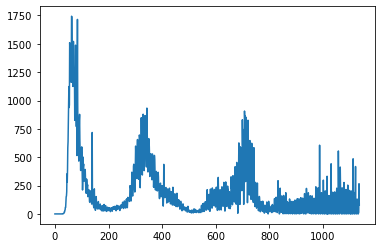

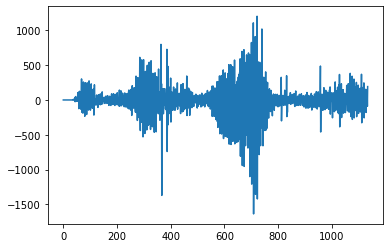

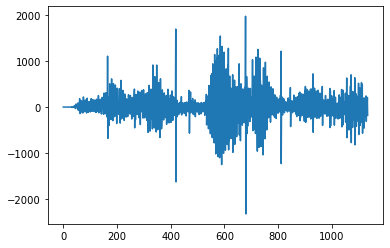

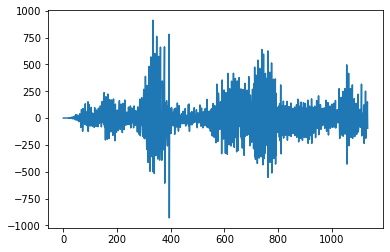

In [31]:
data_east['daily_deaths'].plot()
plt.show()

data_midwest_stationary['daily_deaths'].plot()
plt.show()

data_south_stationary['daily_deaths'].plot()
plt.show()

data_west_stationary['daily_deaths'].plot()
plt.show()

In [58]:
#defining MASE

def MASE(Actual, Predicted):
    n = len(Actual)
    
    mae = mean_absolute_error(Actual, Predicted)

    # Calculate the denominator
    denominator = 1 / (n - 1) * np.sum(np.abs(Actual.iloc[1:].values - Actual.iloc[:-1].values))

    # Avoid division by zero or small denominators
    if denominator > 1e-6:
        mase = mae / denominator
    else:
        mase = np.inf

    return mase

# Seasonal ARIMA

<AxesSubplot:>

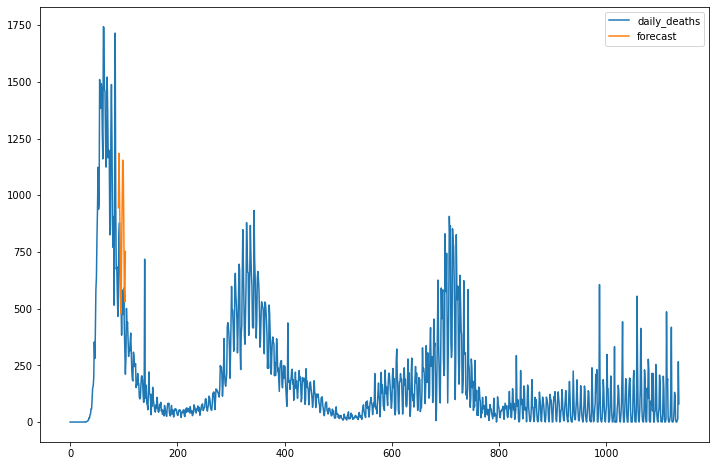

In [32]:
#east

model=sm.tsa.statespace.SARIMAX(data_east['daily_deaths'],order=(5, 1, 4),seasonal_order=(1,1,1,12))
results=model.fit()

data_east['forecast']=results.predict(start=90,end=103,dynamic=True)
data_east[['daily_deaths','forecast']].plot(figsize=(12,8))

In [33]:
# Define the forecasted period
start_idx = 90
end_idx = 103

# Slice the actual data to match the forecasted period
actual_data = data_east['daily_deaths'].iloc[start_idx:end_idx]

# Slice the forecasted values to match the forecasted period
forecast_values = data_east['daily_deaths'].iloc[start_idx:end_idx]

# Calculate performance metrics
mse = mean_squared_error(actual_data, forecast_values)
mae = mean_absolute_error(actual_data, forecast_values)
rmse = np.sqrt(mse)

# Print the performance metrics
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Squared Error (MSE): 0.0
Mean Absolute Error (MAE): 0.0
Root Mean Squared Error (RMSE): 0.0


<AxesSubplot:>

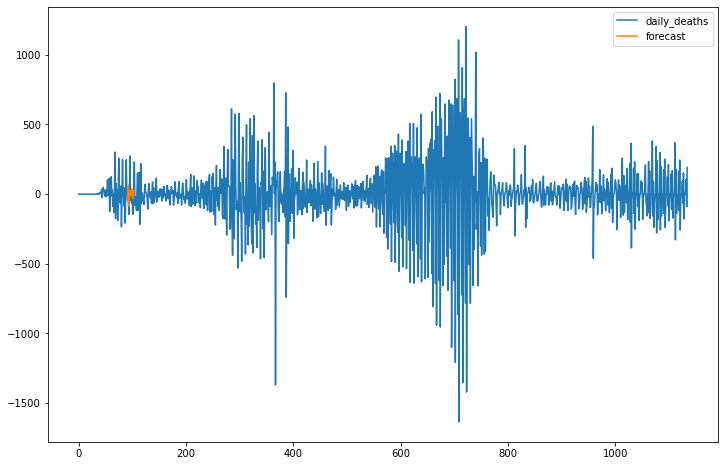

In [34]:
#midwest

model=sm.tsa.statespace.SARIMAX(data_midwest_stationary['daily_deaths'],order=(2, 0, 3),seasonal_order=(1,1,1,12))
results=model.fit()

data_midwest_stationary['forecast']=results.predict(start=90,end=103,dynamic=True)
data_midwest_stationary[['daily_deaths','forecast']].plot(figsize=(12,8))

In [35]:
# Define the forecasted period
start_idx = 90
end_idx = 103

# Slice the actual data to match the forecasted period
actual_data = data_midwest_stationary['daily_deaths'].iloc[start_idx:end_idx]

# Slice the forecasted values to match the forecasted period
forecast_values = data_midwest['daily_deaths'].iloc[start_idx:end_idx]

# Calculate performance metrics
mse = mean_squared_error(actual_data, forecast_values)
mae = mean_absolute_error(actual_data, forecast_values)
rmse = np.sqrt(mse)

# Print the performance metrics
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Squared Error (MSE): 137712.15384615384
Mean Absolute Error (MAE): 347.2307692307692
Root Mean Squared Error (RMSE): 371.09588228132344


<AxesSubplot:>

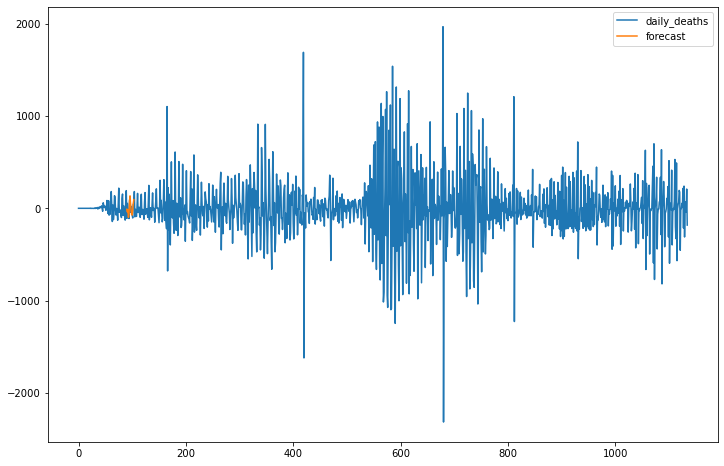

In [36]:
#south

model=sm.tsa.statespace.SARIMAX(data_south_stationary['daily_deaths'],order=(5, 0, 2),seasonal_order=(1,1,1,12))
results=model.fit()

data_south_stationary['forecast']=results.predict(start=90,end=103,dynamic=True)
data_south_stationary[['daily_deaths','forecast']].plot(figsize=(12,8))

In [37]:
# Define the forecasted period
start_idx = 90
end_idx = 103

# Slice the actual data to match the forecasted period
actual_data = data_south_stationary['daily_deaths'].iloc[start_idx:end_idx]

# Slice the forecasted values to match the forecasted period
forecast_values = data_south['daily_deaths'].iloc[start_idx:end_idx]

# Calculate performance metrics
mse = mean_squared_error(actual_data, forecast_values)
mae = mean_absolute_error(actual_data, forecast_values)
rmse = np.sqrt(mse)

# Print the performance metrics
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Squared Error (MSE): 103274.15384615384
Mean Absolute Error (MAE): 291.38461538461536
Root Mean Squared Error (RMSE): 321.36296277908855


<AxesSubplot:>

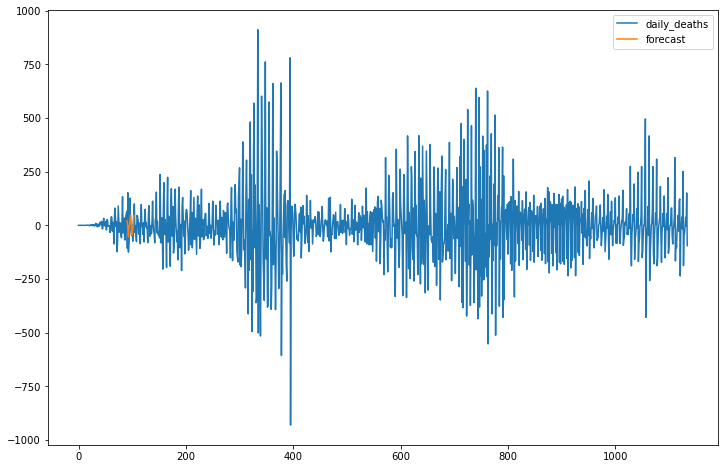

In [38]:
#west

model=sm.tsa.statespace.SARIMAX(data_west_stationary['daily_deaths'],order=(5, 0, 2),seasonal_order=(1,1,1,12))
results=model.fit()

data_west_stationary['forecast']=results.predict(start=90,end=103,dynamic=True)
data_west_stationary[['daily_deaths','forecast']].plot(figsize=(12,8))

In [39]:
# Import necessary libraries
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Define the forecasted period
start_idx = 90
end_idx = 103

# Slice the actual data to match the forecasted period
actual_data = data_west_stationary['daily_deaths'].iloc[start_idx:end_idx]

# Slice the forecasted values to match the forecasted period
forecast_values = data_west['daily_deaths'].iloc[start_idx:end_idx]

# Calculate performance metrics
mse = mean_squared_error(actual_data, forecast_values)
mae = mean_absolute_error(actual_data, forecast_values)
rmse = np.sqrt(mse)

# Print the performance metrics
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Squared Error (MSE): 41529.846153846156
Mean Absolute Error (MAE): 171.53846153846155
Root Mean Squared Error (RMSE): 203.78872921201054


# Preliminary Arima 

In [24]:
#defining MASE

def MASE(Actual, Predicted):
    n = len(Actual)
    
    mae = mean_absolute_error(Actual, Predicted)

    # Calculate the denominator
    denominator = 1 / (n - 1) * np.sum(np.abs(Actual.iloc[1:].values - Actual.iloc[:-1].values))

    # Avoid division by zero or small denominators
    if denominator > 1e-6:
        mase = mae / denominator
    else:
        mase = np.inf

    return mase

Mean Squared Error: 14457.13848727666
Root Mean Squared Error (RMSE): 120.23784132824682
Mean Absolute Error (MAE): 77.1161960599549


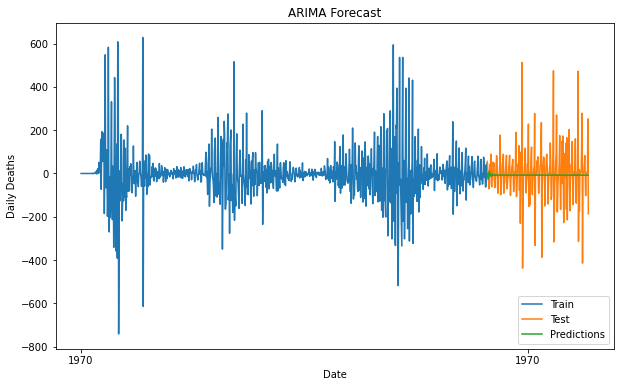

In [41]:
#East

data_east_stationary.index = pd.to_datetime(data_east_stationary.index)

# Split the data into training and testing sets
train_size = int(len(data_east_stationary) * 0.8)  # 80% train, 20% test
train_data, test_data = data_east_stationary.iloc[:train_size], data_east_stationary.iloc[train_size:]

# Fit ARIMA model
# Example order (p, d, q)
model = ARIMA(train_data['daily_deaths'], order=(5,1,0))  
fitted_model = model.fit()

# Make predictions
predictions = fitted_model.forecast(steps=len(test_data))

# Evaluate the model
mse = mean_squared_error(test_data['daily_deaths'], predictions)
print("Mean Squared Error:", mse)

# Compute RMSE
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Compute MAE
mae = mean_absolute_error(test_data['daily_deaths'], predictions)
print("Mean Absolute Error (MAE):", mae)

# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.plot(train_data.index, train_data['daily_deaths'], label='Train')
plt.plot(test_data.index, test_data['daily_deaths'], label='Test')
plt.plot(test_data.index, predictions, label='Predictions')
plt.xlabel('Date')
plt.ylabel('Daily Deaths')
plt.title('ARIMA Forecast')
plt.legend()
plt.show()

Mean Squared Error: 18044.80530514958
Root Mean Squared Error (RMSE): 134.33095438189062
Mean Absolute Error (MAE): 98.92027483806997


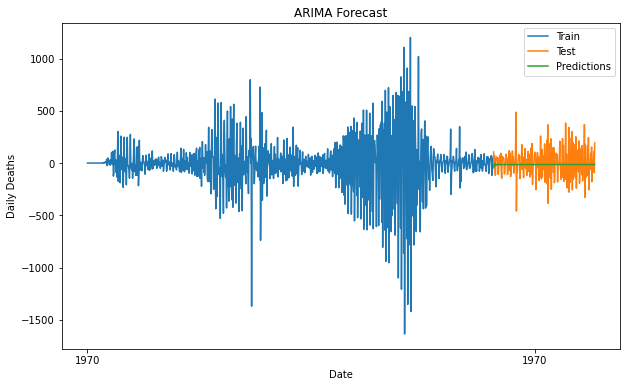

In [42]:
#Midwest 

data_midwest_stationary.index = pd.to_datetime(data_midwest_stationary.index)

# Split the data into training and testing sets
train_size = int(len(data_midwest_stationary) * 0.8)  # 80% train, 20% test
train_data, test_data = data_midwest_stationary.iloc[:train_size], data_midwest_stationary.iloc[train_size:]

# Fit ARIMA model
# Example order (p, d, q)
model = ARIMA(train_data['daily_deaths'], order=(5,1,0))  
fitted_model = model.fit()

# Make predictions
predictions = fitted_model.forecast(steps=len(test_data))

# Evaluate the model
mse = mean_squared_error(test_data['daily_deaths'], predictions)
print("Mean Squared Error:", mse)

# Compute RMSE
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Compute MAE
mae = mean_absolute_error(test_data['daily_deaths'], predictions)
print("Mean Absolute Error (MAE):", mae)

# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.plot(train_data.index, train_data['daily_deaths'], label='Train')
plt.plot(test_data.index, test_data['daily_deaths'], label='Test')
plt.plot(test_data.index, predictions, label='Predictions')
plt.xlabel('Date')
plt.ylabel('Daily Deaths')
plt.title('ARIMA Forecast')
plt.legend()
plt.show()

Mean Squared Error: 13213.922504141561
Root Mean Squared Error (RMSE): 114.95182688475012
Mean Absolute Error (MAE): 80.30101620756429


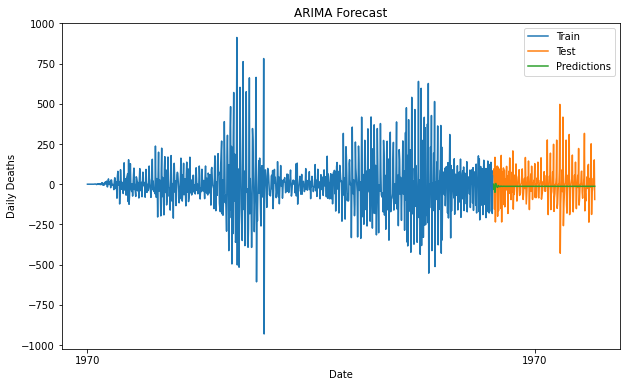

In [43]:
#West 

data_west_stationary.index = pd.to_datetime(data_west_stationary.index)

# Split the data into training and testing sets
train_size = int(len(data_west_stationary) * 0.8)  # 80% train, 20% test
train_data, test_data = data_west_stationary.iloc[:train_size], data_west_stationary.iloc[train_size:]

# Fit ARIMA model
# Example order (p, d, q)
model = ARIMA(train_data['daily_deaths'], order=(5,1,0))  
fitted_model = model.fit()

# Make predictions
predictions = fitted_model.forecast(steps=len(test_data))

# Evaluate the model
mse = mean_squared_error(test_data['daily_deaths'], predictions)
print("Mean Squared Error:", mse)

# Compute RMSE
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Compute MAE
mae = mean_absolute_error(test_data['daily_deaths'], predictions)
print("Mean Absolute Error (MAE):", mae)

# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.plot(train_data.index, train_data['daily_deaths'], label='Train')
plt.plot(test_data.index, test_data['daily_deaths'], label='Test')
plt.plot(test_data.index, predictions, label='Predictions')
plt.xlabel('Date')
plt.ylabel('Daily Deaths')
plt.title('ARIMA Forecast')
plt.legend()
plt.show()

Mean Squared Error: 65281.168572451315
Root Mean Squared Error (RMSE): 255.50179759142853
Mean Absolute Error (MAE): 188.88359609501285


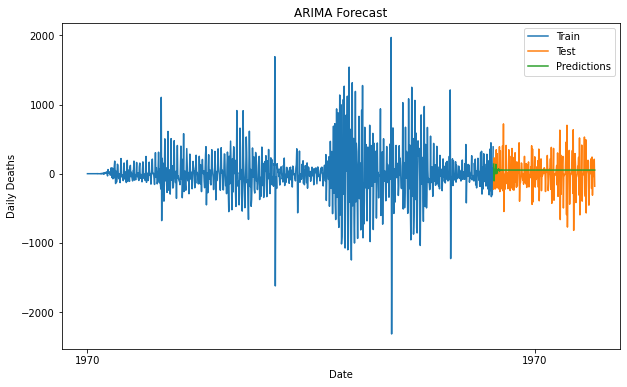

In [44]:
#South

data_south_stationary.index = pd.to_datetime(data_south_stationary.index)

# Split the data into training and testing sets
train_size = int(len(data_south_stationary) * 0.8)  # 80% train, 20% test
train_data, test_data = data_south_stationary.iloc[:train_size], data_south_stationary.iloc[train_size:]

# Fit ARIMA model
# Example order (p, d, q)
model = ARIMA(train_data['daily_deaths'], order=(5,1,0))  
fitted_model = model.fit()

# Make predictions
predictions = fitted_model.forecast(steps=len(test_data))

# Evaluate the model
mse = mean_squared_error(test_data['daily_deaths'], predictions)
print("Mean Squared Error:", mse)

# Compute RMSE
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Compute MAE
mae = mean_absolute_error(test_data['daily_deaths'], predictions)
print("Mean Absolute Error (MAE):", mae)

# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.plot(train_data.index, train_data['daily_deaths'], label='Train')
plt.plot(test_data.index, test_data['daily_deaths'], label='Test')
plt.plot(test_data.index, predictions, label='Predictions')
plt.xlabel('Date')
plt.ylabel('Daily Deaths')
plt.title('ARIMA Forecast')
plt.legend()
plt.show()

# Arima

In [45]:
import warnings
import statsmodels.api 
warnings.filterwarnings("ignore",category = statsmodels.tools.sm_exceptions.ConvergenceWarning)
warnings.filterwarnings("ignore",category =  UserWarning)
warnings.filterwarnings("ignore",category = statsmodels.tools.sm_exceptions.ValueWarning)

if 1:
    import statsmodels.api as sm

    results=[]
    for p in range(1,3):
        for q in range(1,3):
            for P in range(1,3):
                for Q in range(1,3):
                    print(p,q,P,Q)
                    model=sm.tsa.statespace.SARIMAX(data_east['daily_deaths'],order=(p,1,q), seasonal_order=(P,1,Q,12)).fit()
                    results.append([p,q,P,Q,model.aic])

1 1 1 1
1 1 1 2
1 1 2 1
1 1 2 2
1 2 1 1
1 2 1 2
1 2 2 1
1 2 2 2
2 1 1 1
2 1 1 2
2 1 2 1
2 1 2 2
2 2 1 1
2 2 1 2
2 2 2 1
2 2 2 2


Mean Squared Error (Train): 6544.456879308068
Mean Absolute Error (Train): 48.45338293533951
Mean Squared Error (Test): 13485.22574747086
Mean Absolute Scaled Error (MASE): 0.6215753985950463
Mean Absolute Error (Test): 69.85847400139016
Root Mean Squared Error (RMSE): 116.12590472186152


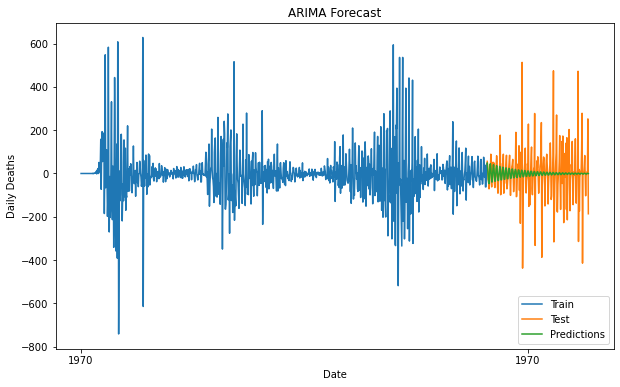

In [46]:
#EAST

data_east_stationary.index = pd.to_datetime(data_east_stationary.index)

# Split the data into training and testing sets
train_size = int(len(data_east_stationary) * 0.8)  # 80% train, 20% test
train_data, test_data = data_east_stationary.iloc[:train_size], data_east_stationary.iloc[train_size:]

# Fit ARIMA model
model = ARIMA(train_data['daily_deaths'], order=(5,1,4))  
fitted_model = model.fit()

# Make predictions
predictions_train = fitted_model.predict(start=train_data.index[0], end=train_data.index[-1])
predictions_test = fitted_model.forecast(steps=len(test_data))

# Evaluate the model - train 
mse_train = mean_squared_error(train_data['daily_deaths'], predictions_train)
print("Mean Squared Error (Train):", mse_train)

mae_train = mean_absolute_error(train_data['daily_deaths'], predictions_train)
print("Mean Absolute Error (Train):", mae_train)

# Evaluate the model - test
mse_test = mean_squared_error(test_data['daily_deaths'], predictions_test)
print("Mean Squared Error (Test):", mse_test)

mae_test = mean_absolute_error(test_data['daily_deaths'], predictions_test)

# Calculate MASE
def calculate_mase(test_data, predictions_test, seasonality):
    n = len(test_data)
    mae_test = mean_absolute_error(test_data, predictions_test)
    mase_denominator = np.mean(np.abs(np.diff(test_data, seasonality)))
    mase = mae_test / mase_denominator
    return mase

# Compute MASE
seasonality = 1  # Assuming the data has daily seasonality
mase_test = calculate_mase(test_data['daily_deaths'], predictions_test, seasonality)
print("Mean Absolute Scaled Error (MASE):", mase_test)

print("Mean Absolute Error (Test):", mae_test)

# Compute RMSE
rmse = np.sqrt(mse_test)
print("Root Mean Squared Error (RMSE):", rmse)

# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.plot(train_data.index, train_data['daily_deaths'], label='Train')
plt.plot(test_data.index, test_data['daily_deaths'], label='Test')
plt.plot(test_data.index, predictions_test, label='Predictions')
plt.xlabel('Date')
plt.ylabel('Daily Deaths')
plt.title('ARIMA Forecast')
plt.legend()
plt.show()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.71 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=11180.801, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=11180.471, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=11177.523, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=11073.077, Time=0.10 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=11000.209, Time=0.14 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=11118.625, Time=0.04 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=10983.361, Time=0.25 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=11091.601, Time=0.05 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=10909.004, Time=0.26 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=11004.371, Time=0.07 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=10822.811, Time=0.36 sec
 ARIMA(5,0,0)(0,0,0)[0]             : AIC=10843.810, Time=0.09 sec
 ARIMA(5,0,2)(0,0,0)[0]             : AIC=10645.434, Time=0.81 sec
 ARIMA(4,0,2)(0,0,0)[0]  

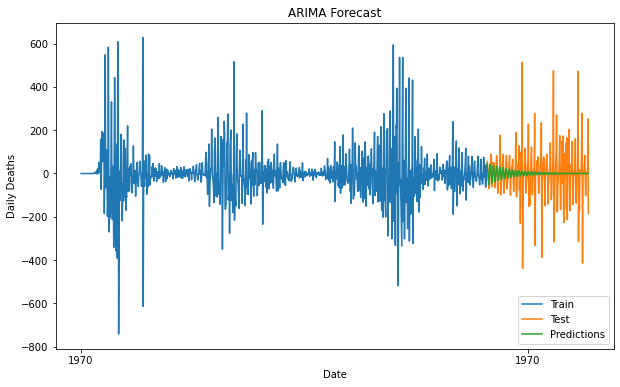

In [47]:
# Fit auto-ARIMA model - EAST 


auto_model = auto_arima(train_data['daily_deaths'], seasonal=False, trace=True)

# Get the optimal order
order = auto_model.order
print("Optimal ARIMA Order:", order)

# Fit ARIMA model with the optimal order
model = ARIMA(train_data['daily_deaths'], order=order)  
fitted_model = model.fit()

# Make predictions
predictions = fitted_model.forecast(steps=len(test_data))

# Evaluate the model
mse = mean_squared_error(test_data['daily_deaths'], predictions)
print("Mean Squared Error:", mse)

# Compute RMSE
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Compute MAE
mae = mean_absolute_error(test_data['daily_deaths'], predictions)
print("Mean Absolute Error (MAE):", mae)

# Calculate MASE
def calculate_mase(test_data, predictions_test, seasonality):
    n = len(test_data)
    mae_test = mean_absolute_error(test_data, predictions_test)
    mase_denominator = np.mean(np.abs(np.diff(test_data, seasonality)))
    mase = mae_test / mase_denominator
    return mase

# Compute MASE
seasonality = 1  # Assuming the data has daily seasonality
mase_test = calculate_mase(test_data['daily_deaths'], predictions_test, seasonality)
print("Mean Absolute Scaled Error (MASE):", mase_test)


# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.plot(train_data.index, train_data['daily_deaths'], label='Train')
plt.plot(test_data.index, test_data['daily_deaths'], label='Test')
plt.plot(test_data.index, predictions, label='Predictions')
plt.xlabel('Date')
plt.ylabel('Daily Deaths')
plt.title('ARIMA Forecast')
plt.legend()
plt.show()

In [48]:
#EAST
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           daily_deaths   No. Observations:                  908
Model:                 ARIMA(5, 0, 4)   Log Likelihood               -5281.400
Date:                Sat, 02 Mar 2024   AIC                          10584.800
Time:                        11:49:50   BIC                          10637.724
Sample:                    01-01-1970   HQIC                         10605.009
                         - 01-01-1970                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0785      1.344      0.058      0.953      -2.557       2.713
ar.L1          0.4833      0.041     11.846      0.000       0.403       0.563
ar.L2         -1.0794      0.037    -29.211      0.000      -1.152      -1.007
ar.L3          0.2352      0.054      4.368      0.000       0.130       0.341
ar.L4         -0.5870      0.024    -24.869      0.000      -0.633      -0.541
ar.L5         -0.3385      0.029    -11.794      0.000      -0.395      -0.282
ma.L1         -0.9610      0.040    -24.214      0.000      -1.039      -0.883
ma.L2          1.1038      0.053     20.810      0.000       1.000       1.208
ma.L3         -0.6773      0.057    -11.847      0.000      -0.789      -0.565
ma.L4          0.5376      0.030     18.136      0.000       0.480       0.596
sigma2      6596.3000    145.825     45.234      0.000    6310.488    6882.112
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):              3609.72
Prob(Q):                              0.78   Prob(JB):                         0.00
Heteroskedasticity (H):               0.61   Skew:                             0.94
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.59
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Mean Squared Error (Train): 38807.764652645994
Mean Absolute Error (Train): 125.94759171588665
Mean Squared Error (Test): 16161.404300239274
Mean Absolute Error (Test): 91.10747095861801
Mean Absolute Scaled Error (MASE): 0.5649378120736321
Root Mean Squared Error (RMSE): 127.12751197218985


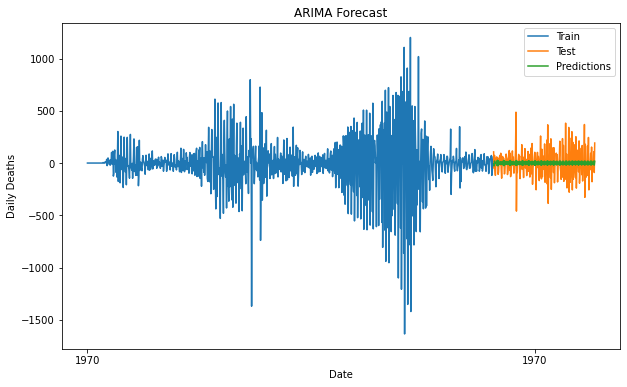

In [49]:
#Midwest 

data_midwest_stationary.index = pd.to_datetime(data_midwest_stationary.index)

# Split the data into training and testing sets
train_size = int(len(data_midwest_stationary) * 0.8)  # 80% train, 20% test
train_data, test_data = data_midwest_stationary.iloc[:train_size], data_midwest_stationary.iloc[train_size:]

# Fit ARIMA model
model = ARIMA(train_data['daily_deaths'], order=(5,1,4))  
fitted_model = model.fit()

# Make predictions
predictions_train = fitted_model.predict(start=train_data.index[0], end=train_data.index[-1])
predictions_test = fitted_model.forecast(steps=len(test_data))

# Evaluate the model - train 
mse_train = mean_squared_error(train_data['daily_deaths'], predictions_train)
print("Mean Squared Error (Train):", mse_train)

mae_train = mean_absolute_error(train_data['daily_deaths'], predictions_train)
print("Mean Absolute Error (Train):", mae_train)

# Evaluate the model - test
mse_test = mean_squared_error(test_data['daily_deaths'], predictions_test)
print("Mean Squared Error (Test):", mse_test)

mae_test = mean_absolute_error(test_data['daily_deaths'], predictions_test)
print("Mean Absolute Error (Test):", mae_test)

# Calculate MASE
def calculate_mase(test_data, predictions_test, seasonality):
    n = len(test_data)
    mae_test = mean_absolute_error(test_data, predictions_test)
    mase_denominator = np.mean(np.abs(np.diff(test_data, seasonality)))
    mase = mae_test / mase_denominator
    return mase

# Compute MASE
seasonality = 1  # Assuming the data has daily seasonality
mase_test = calculate_mase(test_data['daily_deaths'], predictions_test, seasonality)
print("Mean Absolute Scaled Error (MASE):", mase_test)


# Compute RMSE
rmse = np.sqrt(mse_test)
print("Root Mean Squared Error (RMSE):", rmse)

# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.plot(train_data.index, train_data['daily_deaths'], label='Train')
plt.plot(test_data.index, test_data['daily_deaths'], label='Test')
plt.plot(test_data.index, predictions_test, label='Predictions')
plt.xlabel('Date')
plt.ylabel('Daily Deaths')
plt.title('ARIMA Forecast')
plt.legend()
plt.show()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=12179.834, Time=0.28 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=12608.888, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=12490.058, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=12227.867, Time=0.07 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=12180.191, Time=0.17 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=12198.312, Time=0.22 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=12011.603, Time=0.39 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=12139.852, Time=0.21 sec
 ARIMA(4,0,2)(0,0,0)[0]             : AIC=12035.468, Time=0.49 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=12086.348, Time=0.71 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=12092.461, Time=0.39 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=12067.025, Time=0.26 sec
 ARIMA(4,0,3)(0,0,0)[0]             : AIC=11932.155, Time=0.57 sec
 ARIMA(5,0,3)(0,0,0)[0]             : AIC=11844.274, Time=0.95 sec
 ARIMA(5,0,2)(0,0,0

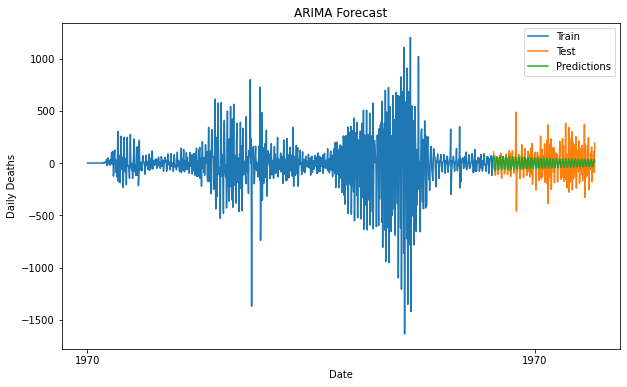

In [50]:
# Fit auto-ARIMA model
auto_model = auto_arima(train_data['daily_deaths'], seasonal=False, trace=True)

# Get the optimal order
order = auto_model.order
print("Optimal ARIMA Order:", order)

# Fit ARIMA model with the optimal order
model = ARIMA(train_data['daily_deaths'], order=order)  
fitted_model = model.fit()

# Make predictions
predictions = fitted_model.forecast(steps=len(test_data))

# Evaluate the model
mse = mean_squared_error(test_data['daily_deaths'], predictions)
print("Mean Squared Error:", mse)

# Compute RMSE
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Compute MAE
mae = mean_absolute_error(test_data['daily_deaths'], predictions)
print("Mean Absolute Error (MAE):", mae)

# Calculate MASE
def calculate_mase(test_data, predictions_test, seasonality):
    n = len(test_data)
    mae_test = mean_absolute_error(test_data, predictions_test)
    mase_denominator = np.mean(np.abs(np.diff(test_data, seasonality)))
    mase = mae_test / mase_denominator
    return mase

# Compute MASE
seasonality = 1  # Assuming the data has daily seasonality
mase_test = calculate_mase(test_data['daily_deaths'], predictions_test, seasonality)
print("Mean Absolute Scaled Error (MASE):", mase_test)


# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.plot(train_data.index, train_data['daily_deaths'], label='Train')
plt.plot(test_data.index, test_data['daily_deaths'], label='Test')
plt.plot(test_data.index, predictions, label='Predictions')
plt.xlabel('Date')
plt.ylabel('Daily Deaths')
plt.title('ARIMA Forecast')
plt.legend()
plt.show()

In [51]:
#Midwest
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           daily_deaths   No. Observations:                  908
Model:                 ARIMA(5, 0, 2)   Log Likelihood               -5935.842
Date:                Sat, 02 Mar 2024   AIC                          11889.684
Time:                        11:50:00   BIC                          11932.985
Sample:                    01-01-1970   HQIC                         11906.219
                         - 01-01-1970                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0736      1.038      0.071      0.943      -1.961       2.108
ar.L1          0.0579      0.013      4.310      0.000       0.032       0.084
ar.L2         -0.5204      0.014    -36.121      0.000      -0.549      -0.492
ar.L3         -0.4343      0.014    -30.346      0.000      -0.462      -0.406
ar.L4         -0.3672      0.014    -25.778      0.000      -0.395      -0.339
ar.L5         -0.5060      0.017    -30.556      0.000      -0.538      -0.474
ma.L1         -1.0226      0.011    -91.941      0.000      -1.044      -1.001
ma.L2          0.7004      0.010     67.949      0.000       0.680       0.721
sigma2      1.617e+04    244.920     66.002      0.000    1.57e+04    1.66e+04
===================================================================================
Ljung-Box (L1) (Q):                   8.57   Jarque-Bera (JB):              2951.26
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               6.45   Skew:                             0.37
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.80
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Mean Squared Error (Train): 46482.249688804026
Mean Absolute Error (Train): 131.2123501714962
Mean Squared Error (Test): 57462.31047423359
Mean Absolute Error (Test): 169.81442725130591
Mean Absolute Scaled Error (MASE): 0.5307875160267086
Root Mean Squared Error (RMSE): 239.71297518956624


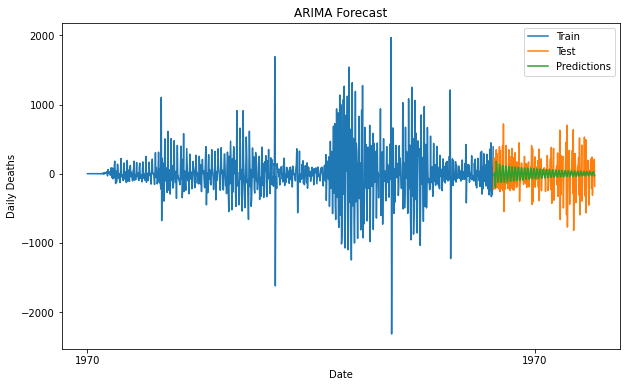

In [52]:
#South 

data_south_stationary.index = pd.to_datetime(data_south_stationary.index)


# Split the data into training and testing sets
train_size = int(len(data_south_stationary) * 0.8)  # 80% train, 20% test
train_data, test_data = data_south_stationary.iloc[:train_size], data_south_stationary.iloc[train_size:]

# Fit ARIMA model
model = ARIMA(train_data['daily_deaths'], order=(5,1,4))  
fitted_model = model.fit()

# Make predictions
predictions_train = fitted_model.predict(start=train_data.index[0], end=train_data.index[-1])
predictions_test = fitted_model.forecast(steps=len(test_data))

# Evaluate the model - train 
mse_train = mean_squared_error(train_data['daily_deaths'], predictions_train)
print("Mean Squared Error (Train):", mse_train)

mae_train = mean_absolute_error(train_data['daily_deaths'], predictions_train)
print("Mean Absolute Error (Train):", mae_train)

# Evaluate the model - test
mse_test = mean_squared_error(test_data['daily_deaths'], predictions_test)
print("Mean Squared Error (Test):", mse_test)

mae_test = mean_absolute_error(test_data['daily_deaths'], predictions_test)
print("Mean Absolute Error (Test):", mae_test)

# Calculate MASE
def calculate_mase(test_data, predictions_test, seasonality):
    n = len(test_data)
    mae_test = mean_absolute_error(test_data, predictions_test)
    mase_denominator = np.mean(np.abs(np.diff(test_data, seasonality)))
    mase = mae_test / mase_denominator
    return mase

# Compute MASE
seasonality = 1  # Assuming the data has daily seasonality
mase_test = calculate_mase(test_data['daily_deaths'], predictions_test, seasonality)
print("Mean Absolute Scaled Error (MASE):", mase_test)


# Compute RMSE
rmse = np.sqrt(mse_test)
print("Root Mean Squared Error (RMSE):", rmse)

# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.plot(train_data.index, train_data['daily_deaths'], label='Train')
plt.plot(test_data.index, test_data['daily_deaths'], label='Test')
plt.plot(test_data.index, predictions_test, label='Predictions')
plt.xlabel('Date')
plt.ylabel('Daily Deaths')
plt.title('ARIMA Forecast')
plt.legend()
plt.show()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=12673.173, Time=0.51 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=13182.562, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=13162.284, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=13002.513, Time=0.07 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=12878.620, Time=0.16 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=12842.774, Time=0.19 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=12621.674, Time=0.46 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=12795.967, Time=0.29 sec
 ARIMA(4,0,2)(0,0,0)[0]             : AIC=12485.680, Time=0.73 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=12696.858, Time=0.34 sec
 ARIMA(5,0,2)(0,0,0)[0]             : AIC=12352.217, Time=1.30 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=12505.101, Time=0.86 sec
 ARIMA(5,0,3)(0,0,0)[0]             : AIC=12365.939, Time=0.93 sec
 ARIMA(4,0,3)(0,0,0)[0]             : AIC=12405.997, Time=0.86 sec
 ARIMA(5,0,2)(0,0,0

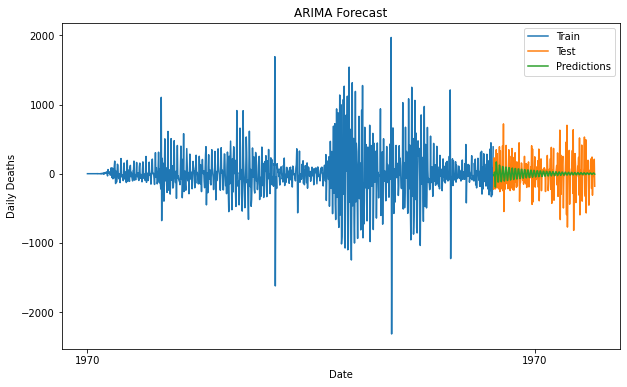

In [53]:
# Fit auto-ARIMA model
auto_model = auto_arima(train_data['daily_deaths'], seasonal=False, trace=True)

# Get the optimal order
order = auto_model.order
print("Optimal ARIMA Order:", order)

# Fit ARIMA model with the optimal order
model = ARIMA(train_data['daily_deaths'], order=order)  
fitted_model = model.fit()

# Make predictions
predictions = fitted_model.forecast(steps=len(test_data))

# Evaluate the model
mse = mean_squared_error(test_data['daily_deaths'], predictions)
print("Mean Squared Error:", mse)

# Compute RMSE
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Compute MAE
mae = mean_absolute_error(test_data['daily_deaths'], predictions)
print("Mean Absolute Error (MAE):", mae)

# Calculate MASE
def calculate_mase(test_data, predictions_test, seasonality):
    n = len(test_data)
    mae_test = mean_absolute_error(test_data, predictions_test)
    mase_denominator = np.mean(np.abs(np.diff(test_data, seasonality)))
    mase = mae_test / mase_denominator
    return mase

# Compute MASE
seasonality = 1  # Assuming the data has daily seasonality
mase_test = calculate_mase(test_data['daily_deaths'], predictions_test, seasonality)
print("Mean Absolute Scaled Error (MASE):", mase_test)


# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.plot(train_data.index, train_data['daily_deaths'], label='Train')
plt.plot(test_data.index, test_data['daily_deaths'], label='Test')
plt.plot(test_data.index, predictions, label='Predictions')
plt.xlabel('Date')
plt.ylabel('Daily Deaths')
plt.title('ARIMA Forecast')
plt.legend()
plt.show()

In [54]:
#South
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           daily_deaths   No. Observations:                  908
Model:                 ARIMA(5, 0, 2)   Log Likelihood               -6168.492
Date:                Sat, 02 Mar 2024   AIC                          12354.985
Time:                        11:50:11   BIC                          12398.286
Sample:                    01-01-1970   HQIC                         12371.519
                         - 01-01-1970                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4237      2.020      0.210      0.834      -3.536       4.383
ar.L1          0.1498      0.027      5.623      0.000       0.098       0.202
ar.L2         -0.6181      0.024    -26.151      0.000      -0.664      -0.572
ar.L3         -0.3429      0.023    -14.642      0.000      -0.389      -0.297
ar.L4         -0.3538      0.021    -17.111      0.000      -0.394      -0.313
ar.L5         -0.4744      0.023    -20.489      0.000      -0.520      -0.429
ma.L1         -0.9686      0.027    -35.743      0.000      -1.022      -0.915
ma.L2          0.5947      0.026     23.103      0.000       0.544       0.645
sigma2      4.425e+04    824.326     53.685      0.000    4.26e+04    4.59e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.84   Jarque-Bera (JB):              7708.53
Prob(Q):                              0.36   Prob(JB):                         0.00
Heteroskedasticity (H):               5.56   Skew:                             1.88
Prob(H) (two-sided):                  0.00   Kurtosis:                        16.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Mean Squared Error (Train): 12233.967139542694
Mean Absolute Error (Train): 72.55002314324088
Mean Squared Error (Test): 10738.427340688553
Mean Absolute Error (Test): 76.27509989741442
Mean Absolute Scaled Error (MASE): 0.615517124073972
Root Mean Squared Error (RMSE): 103.62638341990207


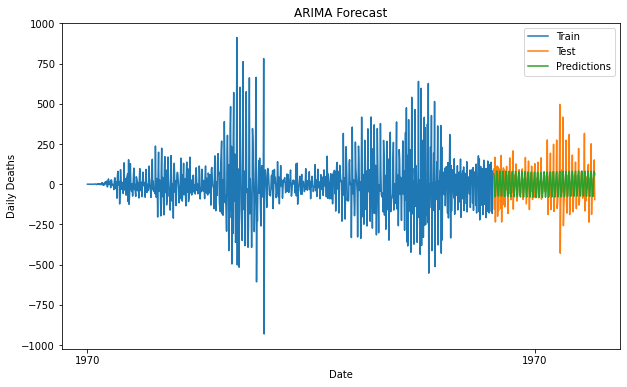

In [55]:
#West 

data_west_stationary.index = pd.to_datetime(data_west_stationary.index)


# Split the data into training and testing sets
train_size = int(len(data_west_stationary) * 0.8)  # 80% train, 20% test
train_data, test_data = data_west_stationary.iloc[:train_size], data_west_stationary.iloc[train_size:]

# Fit ARIMA model
model = ARIMA(train_data['daily_deaths'], order=(5,1,4))  
fitted_model = model.fit()

# Make predictions
predictions_train = fitted_model.predict(start=train_data.index[0], end=train_data.index[-1])
predictions_test = fitted_model.forecast(steps=len(test_data))

# Evaluate the model - train 
mse_train = mean_squared_error(train_data['daily_deaths'], predictions_train)
print("Mean Squared Error (Train):", mse_train)

mae_train = mean_absolute_error(train_data['daily_deaths'], predictions_train)
print("Mean Absolute Error (Train):", mae_train)

# Evaluate the model - test
mse_test = mean_squared_error(test_data['daily_deaths'], predictions_test)
print("Mean Squared Error (Test):", mse_test)

mae_test = mean_absolute_error(test_data['daily_deaths'], predictions_test)
print("Mean Absolute Error (Test):", mae_test)

# Calculate MASE
def calculate_mase(test_data, predictions_test, seasonality):
    n = len(test_data)
    mae_test = mean_absolute_error(test_data, predictions_test)
    mase_denominator = np.mean(np.abs(np.diff(test_data, seasonality)))
    mase = mae_test / mase_denominator
    return mase

# Compute MASE
seasonality = 1  # Assuming the data has daily seasonality
mase_test = calculate_mase(test_data['daily_deaths'], predictions_test, seasonality)
print("Mean Absolute Scaled Error (MASE):", mase_test)


# Compute RMSE
rmse = np.sqrt(mse_test)
print("Root Mean Squared Error (RMSE):", rmse)

# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.plot(train_data.index, train_data['daily_deaths'], label='Train')
plt.plot(test_data.index, test_data['daily_deaths'], label='Test')
plt.plot(test_data.index, predictions_test, label='Predictions')
plt.xlabel('Date')
plt.ylabel('Daily Deaths')
plt.title('ARIMA Forecast')
plt.legend() 
plt.show()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=11554.416, Time=2.06 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=11834.154, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=11811.042, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=11673.253, Time=0.10 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=11549.488, Time=0.24 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=11550.065, Time=0.12 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=11568.094, Time=0.12 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=11540.793, Time=0.33 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=11543.401, Time=0.53 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=11101.569, Time=1.05 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=11085.496, Time=0.64 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=11246.043, Time=0.54 sec
 ARIMA(4,0,3)(0,0,0)[0]             : AIC=11039.581, Time=0.79 sec
 ARIMA(4,0,2)(0,0,0)[0]             : AIC=11129.598, Time=0.76 sec
 ARIMA(5,0,3)(0,0,0

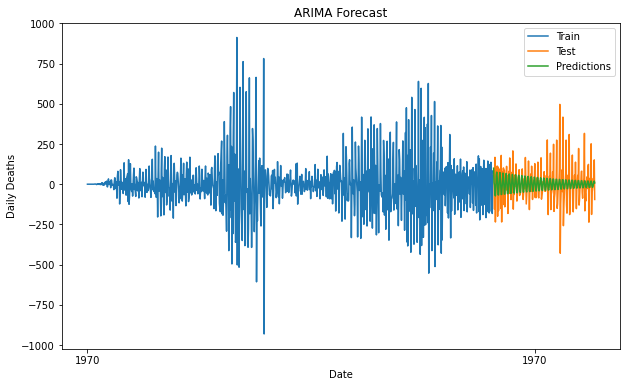

In [56]:
# Fit auto-ARIMA model
auto_model = auto_arima(train_data['daily_deaths'], seasonal=False, trace=True)

# Get the optimal order
order = auto_model.order
print("Optimal ARIMA Order:", order)

# Fit ARIMA model with the optimal order
model = ARIMA(train_data['daily_deaths'], order=order)  
fitted_model = model.fit()

# Make predictions
predictions = fitted_model.forecast(steps=len(test_data))

# Evaluate the model
mse = mean_squared_error(test_data['daily_deaths'], predictions)
print("Mean Squared Error:", mse)

# Compute RMSE
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Compute MAE
mae = mean_absolute_error(test_data['daily_deaths'], predictions)
print("Mean Absolute Error (MAE):", mae)

# Calculate MASE
def calculate_mase(test_data, predictions_test, seasonality):
    n = len(test_data)
    mae_test = mean_absolute_error(test_data, predictions_test)
    mase_denominator = np.mean(np.abs(np.diff(test_data, seasonality)))
    mase = mae_test / mase_denominator
    return mase

# Compute MASE
seasonality = 1  # Assuming the data has daily seasonality
mase_test = calculate_mase(test_data['daily_deaths'], predictions_test, seasonality)
print("Mean Absolute Scaled Error (MASE):", mase_test)


# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.plot(train_data.index, train_data['daily_deaths'], label='Train')
plt.plot(test_data.index, test_data['daily_deaths'], label='Test')
plt.plot(test_data.index, predictions, label='Predictions')
plt.xlabel('Date')
plt.ylabel('Daily Deaths')
plt.title('ARIMA Forecast')
plt.legend()
plt.show() 

In [57]:
#West 
fitted_model.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           daily_deaths   No. Observations:                  908
Model:                 ARIMA(5, 0, 2)   Log Likelihood               -5509.289
Date:                Sat, 02 Mar 2024   AIC                          11036.578
Time:                        11:50:29   BIC                          11079.879
Sample:                    01-01-1970   HQIC                         11053.112
                         - 01-01-1970                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0882      0.968      0.091      0.927      -1.808       1.985
ar.L1          0.2357      0.025      9.444      0.000       0.187       0.285
ar.L2         -0.5591      0.020    -28.607      0.000      -0.597      -0.521
ar.L3         -0.3622      0.023    -15.956      0.000      -0.407      -0.318
ar.L4         -0.3260      0.020    -16.110      0.000      -0.366      -0.286
ar.L5         -0.3890      0.026    -14.691      0.000      -0.441      -0.337
ma.L1         -1.0632      0.023    -47.027      0.000      -1.107      -1.019
ma.L2          0.7137      0.017     42.520      0.000       0.681       0.747
sigma2      9801.8483    205.920     47.600      0.000    9398.252    1.02e+04
===================================================================================
Ljung-Box (L1) (Q):                   1.95   Jarque-Bera (JB):              3031.16
Prob(Q):                              0.16   Prob(JB):                         0.00
Heteroskedasticity (H):               5.81   Skew:                             0.93
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.76
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# AutoArima

# EAST

In [21]:
#East 

auto_model = auto_arima(data_east_stationary['daily_deaths'], seasonal=True, m=7, suppress_warnings=True, stepwise=True)

print(auto_model.summary())
n_periods=12
forecast, conf_int = auto_model.predict(n_periods=n_periods, return_conf_int=True)

# Print the forecast and confidence interval
print("Forecast:", forecast)
print("Confidence Interval:", conf_int) 

                                       SARIMAX Results                                        
Dep. Variable:                                      y   No. Observations:                 1135
Model:             SARIMAX(5, 0, 1)x(2, 0, [1, 2], 7)   Log Likelihood               -6599.481
Date:                                Sun, 03 Mar 2024   AIC                          13220.961
Time:                                        15:15:29   BIC                          13276.339
Sample:                                    01-01-1970   HQIC                         13241.879
                                         - 01-01-1970                                         
Covariance Type:                                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.2481      0.059    -21.091      0.000      -1.364      -1.132
ar.

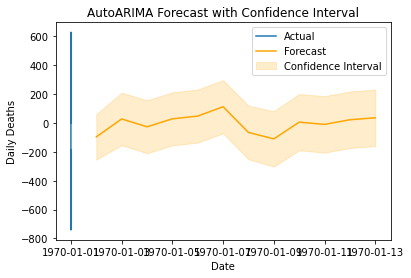

In [22]:
data_east_stationary.index = pd.to_datetime(data_east_stationary.index)

# Generate forecast_index with the appropriate frequency
forecast_index = pd.date_range(data_east_stationary.index[-1], periods=n_periods + 1, freq=data_east_stationary.index.freq)[-n_periods:]

forecast_index = pd.date_range(data_east_stationary.index[-1], periods=n_periods + 1, freq=data_east_stationary.index.freq)[-n_periods:]

plt.plot(data_east_stationary.index, data_east_stationary['daily_deaths'], label='Actual')

plt.plot(forecast_index, forecast, label='Forecast', color='orange')

plt.fill_between(forecast_index, conf_int[:, 0], conf_int[:, 1], color='orange', alpha=0.2, label='Confidence Interval')

# Customize the plot
plt.title('AutoARIMA Forecast with Confidence Interval')
plt.xlabel('Date')
plt.ylabel('Daily Deaths')
plt.legend()
plt.show()

In [25]:
# Calculate MAE
mae = mean_absolute_error(data_east_stationary['daily_deaths'][-n_periods:], forecast)
print("Mean Absolute Error (MAE):", mae)

# Calculate MASE
# Assuming you have a function named MASE to calculate Mean Absolute Scaled Error
mase = MASE(data_east_stationary['daily_deaths'][-n_periods:], forecast)
print("Mean Absolute Scaled Error (MASE):", mase)

Mean Absolute Error (MAE): 96.07911153941234
Mean Absolute Scaled Error (MASE): 0.9951697052104856


# Midwest

In [26]:
#Midwest

auto_model = auto_arima(data_midwest_stationary['daily_deaths'], seasonal=True, m=7, suppress_warnings=True, stepwise=True)

print(auto_model.summary())
n_periods=12
forecast, conf_int = auto_model.predict(n_periods=n_periods, return_conf_int=True)

# Print the forecast and confidence interval
print("Forecast:", forecast)
print("Confidence Interval:", conf_int)

                                      SARIMAX Results                                      
Dep. Variable:                                   y   No. Observations:                 1135
Model:             SARIMAX(3, 0, 2)x(1, 0, [1], 7)   Log Likelihood               -6909.601
Date:                             Sun, 03 Mar 2024   AIC                          13835.203
Time:                                     15:19:25   BIC                          13875.478
Sample:                                 01-01-1970   HQIC                         13850.416
                                      - 01-01-1970                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4547      0.236      1.924      0.054      -0.009       0.918
ar.L2          0.0173      

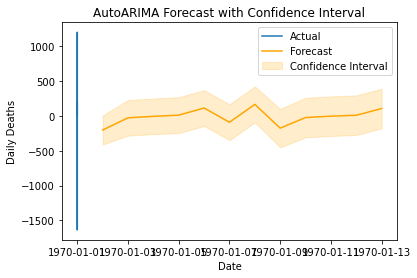

In [27]:
data_midwest_stationary.index = pd.to_datetime(data_midwest_stationary.index)

# Generate forecast_index with the appropriate frequency
forecast_index = pd.date_range(data_midwest_stationary.index[-1], periods=n_periods + 1, freq=data_midwest_stationary.index.freq)[-n_periods:]

forecast_index = pd.date_range(data_midwest_stationary.index[-1], periods=n_periods + 1, freq=data_midwest_stationary.index.freq)[-n_periods:]

plt.plot(data_midwest_stationary.index, data_midwest_stationary['daily_deaths'], label='Actual')

plt.plot(forecast_index, forecast, label='Forecast', color='orange')

plt.fill_between(forecast_index, conf_int[:, 0], conf_int[:, 1], color='orange', alpha=0.2, label='Confidence Interval')

# Customize the plot
plt.title('AutoARIMA Forecast with Confidence Interval')
plt.xlabel('Date')
plt.ylabel('Daily Deaths')
plt.legend()
plt.show()

In [28]:
# Calculate MAE
mae = mean_absolute_error(data_midwest_stationary['daily_deaths'][-n_periods:], forecast)
print("Mean Absolute Error (MAE):", mae)

# Calculate MASE
# Assuming you have a function named MASE to calculate Mean Absolute Scaled Error
mase = MASE(data_midwest_stationary['daily_deaths'][-n_periods:], forecast)
print("Mean Absolute Scaled Error (MASE):", mase)

Mean Absolute Error (MAE): 101.96751712204713
Mean Absolute Scaled Error (MASE): 0.7126065364310791


# South

In [29]:
#South

auto_model = auto_arima(data_south_stationary['daily_deaths'], seasonal=True, m=7, suppress_warnings=True, stepwise=True)

print(auto_model.summary())
n_periods=12
forecast, conf_int = auto_model.predict(n_periods=n_periods, return_conf_int=True)

# Print the forecast and confidence interval
print("Forecast:", forecast)
print("Confidence Interval:", conf_int)

                                      SARIMAX Results                                      
Dep. Variable:                                   y   No. Observations:                 1135
Model:             SARIMAX(2, 0, 2)x(1, 0, [1], 7)   Log Likelihood               -7585.791
Date:                             Sun, 03 Mar 2024   AIC                          15185.582
Time:                                     15:20:35   BIC                          15220.822
Sample:                                          0   HQIC                         15198.893
                                            - 1135                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8941      0.033    -27.299      0.000      -0.958      -0.830
ar.L2          0.0849      

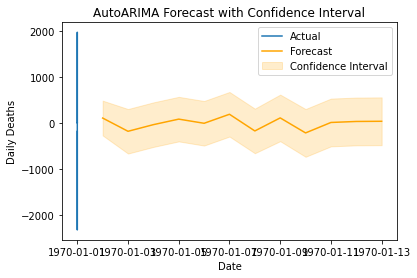

In [30]:
data_south_stationary.index = pd.to_datetime(data_south_stationary.index)

# Generate forecast_index with the appropriate frequency
forecast_index = pd.date_range(data_south_stationary.index[-1], periods=n_periods + 1, freq=data_south_stationary.index.freq)[-n_periods:]

forecast_index = pd.date_range(data_south_stationary.index[-1], periods=n_periods + 1, freq=data_south_stationary.index.freq)[-n_periods:]

plt.plot(data_south_stationary.index, data_south_stationary['daily_deaths'], label='Actual')

plt.plot(forecast_index, forecast, label='Forecast', color='orange')

plt.fill_between(forecast_index, conf_int[:, 0], conf_int[:, 1], color='orange', alpha=0.2, label='Confidence Interval')

# Customize the plot
plt.title('AutoARIMA Forecast with Confidence Interval')
plt.xlabel('Date')
plt.ylabel('Daily Deaths')
plt.legend()
plt.show()

In [31]:
# Calculate MAE
mae = mean_absolute_error(data_south_stationary['daily_deaths'][-n_periods:], forecast)
print("Mean Absolute Error (MAE):", mae)

# Calculate MASE
# Assuming you have a function named MASE to calculate Mean Absolute Scaled Error
mase = MASE(data_south_stationary['daily_deaths'][-n_periods:], forecast)
print("Mean Absolute Scaled Error (MASE):", mase)

Mean Absolute Error (MAE): 147.47270829721558
Mean Absolute Scaled Error (MASE): 0.5650295337058068


# WEST

In [35]:
#West 

auto_model = auto_arima(data_west_stationary['daily_deaths'], seasonal=True, m=7, suppress_warnings=True, stepwise=True)

print(auto_model.summary())
n_periods=12
forecast, conf_int = auto_model.predict(n_periods=n_periods, return_conf_int=True)

# Print the forecast and confidence interval
print("Forecast:", forecast)
print("Confidence Interval:", conf_int)

                                       SARIMAX Results                                        
Dep. Variable:                                      y   No. Observations:                 1135
Model:             SARIMAX(4, 0, 1)x(1, 0, [1, 2], 7)   Log Likelihood               -6655.030
Date:                                Sun, 03 Mar 2024   AIC                          13330.060
Time:                                        15:29:00   BIC                          13380.404
Sample:                                    01-01-1970   HQIC                         13349.076
                                         - 01-01-1970                                         
Covariance Type:                                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0013      0.229     -0.006      0.995      -0.451       0.448
ar.

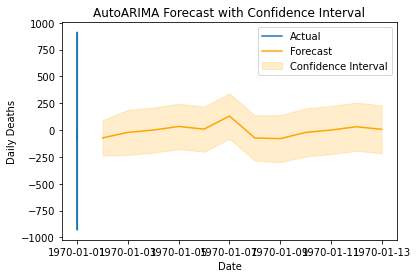

In [36]:
data_west_stationary.index = pd.to_datetime(data_west_stationary.index)

# Generate forecast_index with the appropriate frequency
forecast_index = pd.date_range(data_west_stationary.index[-1], periods=n_periods + 1, freq=data_west_stationary.index.freq)[-n_periods:]

forecast_index = pd.date_range(data_west_stationary.index[-1], periods=n_periods + 1, freq=data_west_stationary.index.freq)[-n_periods:]

plt.plot(data_west_stationary.index, data_west_stationary['daily_deaths'], label='Actual')

plt.plot(forecast_index, forecast, label='Forecast', color='orange')

plt.fill_between(forecast_index, conf_int[:, 0], conf_int[:, 1], color='orange', alpha=0.2, label='Confidence Interval')

# Customize the plot
plt.title('AutoARIMA Forecast with Confidence Interval')
plt.xlabel('Date')
plt.ylabel('Daily Deaths')
plt.legend()
plt.show()

In [37]:
# Calculate MAE
mae = mean_absolute_error(data_west_stationary['daily_deaths'][-n_periods:], forecast)
print("Mean Absolute Error (MAE):", mae)

# Calculate MASE
# Assuming you have a function named MASE to calculate Mean Absolute Scaled Error
mase = MASE(data_west_stationary['daily_deaths'][-n_periods:], forecast)
print("Mean Absolute Scaled Error (MASE):", mase)

Mean Absolute Error (MAE): 95.313943881389
Mean Absolute Scaled Error (MASE): 0.7146921490765363
